In [1]:
import GetData as gd
import importlib

In [2]:
data_dir = "./Data/"
objGetData = gd.GetData(252, 40, data_dir)
pureReturns = objGetData.GetPureReturns()
dfTable = objGetData.GetNewDF()
nticker = objGetData.GetNIndex()

In [3]:
import DefineS
# importlib.reload(DefineS)
objDefineS = DefineS.DefineS(dfTable, 8, 92, 252, 252)
spe_index = objDefineS.GetIrr()
norm_index = objDefineS.GetNorm()
all_index = objDefineS.GetAll()
prob_pair = objDefineS.GetProbPair()
prob_T = DefineS.GetProbTable(prob_pair, pureReturns, 252)

In [4]:
import GenDic
importlib.reload(GenDic)
objGenDic_R1 = GenDic.GenDic("R1", all_index, pureReturns, 252, nticker)
objGenDic_R2 = GenDic.GenDic("R2", all_index, pureReturns, 252, nticker)
objGenDic_R3 = GenDic.GenDic("R3", all_index, pureReturns, 252, nticker)
objGenDic_S = GenDic.GenDic("S", all_index, pureReturns, 252, nticker)
# objGenDic_ML = GenDic.GenDic("ML", all_index, pureReturns, 252, nticker)

In [5]:
gen_dic_R1 = objGenDic_R1.GetGenDic()
gen_dic_syn_R1 = objGenDic_R1.GetSynGenDic()
gen_dic_R2 = objGenDic_R2.GetGenDic()
gen_dic_syn_R2 = objGenDic_R2.GetSynGenDic()
gen_dic_R3 = objGenDic_R1.GetGenDic()
gen_dic_syn_R3 = objGenDic_R3.GetSynGenDic()
gen_dic_S = objGenDic_S.GetGenDic()
gen_dic_syn_S = objGenDic_S.GetSynGenDic()
# gen_dic_ML = objGenDic_ML.GetGenDic()
# gen_dic_syn_ML = objGenDic_ML.GetSynGenDic()
hist_dic = objGenDic_R1.GetHistDic()
hist_dic_syn = objGenDic_R1.GetSynHistDic()


In [6]:
import Evaluation
importlib.reload(Evaluation)
objEva_R1 = Evaluation.Evaluation(hist_dic, gen_dic_R1, "R1")
objEva_R2 = Evaluation.Evaluation(hist_dic, gen_dic_R2, "R2")
objEva_R3 = Evaluation.Evaluation(hist_dic, gen_dic_R3, "R3")
objEva_S = Evaluation.Evaluation(hist_dic, gen_dic_S, "S")
# objEva_ML = Evaluation.Evaluation(hist_dic, gen_dic_ML, "ML")
obj_list = [objEva_R1, objEva_R2, objEva_R3, objEva_S]
# obj_list = [objEva_R1, objEva_R2, objEva_R3, objEva_S, objEva_ML]

In [7]:
import ComputeTable
importlib.reload(ComputeTable)
CT = ComputeTable.ComputeTable(obj_list)

In [8]:
CT.GetStatsTable_1()

,R1,R2,R3,S
Mean Diff of Mean,-0.687976,-1.887049,-0.687976,-0.004666
Mean Diff of Var,0.003597,-0.001978,0.003597,-0.766612
Mean Diff of Skew,0.157433,-0.700184,0.157433,-0.945152
Mean Diff of Kurt,-0.198114,-0.947785,-0.198114,-0.609230
Mean Diff of Min,-0.049017,-0.219966,-0.049017,-0.679197
Mean Diff of Max,-0.126020,-0.159384,-0.126020,-0.642154


In [9]:
CT.GetStatsTable_2()

,R1,R2,R3,S
Std Diff of Mean,10.051290,27.703553,10.051290,5.961420
Std Diff of Var,0.132105,0.089035,0.132105,0.252797
Std Diff of Skew,6.121360,5.532939,6.121360,5.202746
Std Diff of Kurt,1.893359,1.319981,1.893359,4.605964
Std Diff of Min,0.101522,0.230956,0.101522,0.187826
Std Diff of Max,0.123210,0.199328,0.123210,0.146478


In [10]:
CT.GetStatsTable_3()

,R1,R2,R3,S
AVG of AVG Corr Diff,-0.571562,-0.000038,-0.571562,-0.55727


In [11]:
CT.GetStatsTable_4()

,R1,R2,R3,S
AVG of STD CORR DIF,0.199124,0.040236,0.199124,0.201531


In [12]:
print(CT.GetMDTestTable(0.95))
print("0.95 Table")
print(CT.GetMDTestTable(0.99))
print("0.99 Table")
print(CT.GetMDTestTable(0.999))
print("0.999 Table")


Computing signatures of population 1:   0%|          | 0/100 [00:00<?, ?it/s]

            R1  R2  R3  S
# of True    0   0   0  1
# of False   9   9   9  8
0.95 Table


Computing signatures of population 1:   0%|          | 0/100 [00:00<?, ?it/s]

            R1  R2  R3  S
# of True    0   0   0  1
# of False   9   9   9  8
0.99 Table


Computing signatures of population 2: 100%|██████████| 100/100 [00:00<00:00, 1017.79it/s]

            R1  R2  R3  S
# of True    0   1   0  1
# of False   9   8   9  8
0.999 Table


In [13]:
CT.GetKSTable()


,R1,R2,R3,S
KS Test Stats,0.056429,0.092659,0.056429,0.239563


In [14]:
objEva_R1_syn = Evaluation.Evaluation(hist_dic_syn, gen_dic_syn_R1, "R1")
objEva_R2_syn = Evaluation.Evaluation(hist_dic_syn, gen_dic_syn_R2, "R2")
objEva_R3_syn = Evaluation.Evaluation(hist_dic_syn, gen_dic_syn_R3, "R3")
objEva_S_syn = Evaluation.Evaluation(hist_dic_syn, gen_dic_syn_S, "S")
# objEva_ML_syn = Evaluation.Evaluation(hist_dic_syn, gen_dic_syn_ML, "ML")
obj_list_syn = [objEva_R1_syn, objEva_R2_syn, objEva_R3_syn, objEva_S_syn]
# obj_list_syn = [objEva_R1_syn, objEva_R2_syn, objEva_R3_syn, objEva_S_syn, objEva_ML_syn]

In [15]:
CT_syn = ComputeTable.ComputeTable(obj_list_syn)

In [16]:
CT_syn.GetStatsTable_1()

,R1,R2,R3,S
Mean Diff of Mean,-0.161917,-0.334709,0.116093,-0.138061
Mean Diff of Var,-0.785347,0.012594,-0.786959,-0.928223
Mean Diff of Skew,1.843524,2.180664,-0.457959,0.461780
Mean Diff of Kurt,-4.590132,-0.289512,-2.974175,1.220646
Mean Diff of Min,-0.647821,-0.246297,-0.636938,-0.834980
Mean Diff of Max,-0.607500,-0.163259,-0.592593,-0.789694


In [17]:
CT_syn.GetStatsTable_2()

,R1,R2,R3,S
Std Diff of Mean,1.338328,3.129641,1.057195,1.075552
Std Diff of Var,0.065648,0.087135,0.068770,0.131702
Std Diff of Skew,20.769157,21.163654,15.652100,11.494444
Std Diff of Kurt,36.762004,7.773073,18.819135,22.217952
Std Diff of Min,0.114992,0.254662,0.122548,0.137728
Std Diff of Max,0.104658,0.185402,0.112466,0.108288


In [18]:
print(CT_syn.GetMDTestTable(0.99))
print("0.99 Table")
print(CT_syn.GetMDTestTable(0.9999))
print("0.9999 Table")
print(CT_syn.GetMDTestTable(0.999999))
print("0.999999 Table")

  0%|          | 0/100 [00:00<?, ?it/s]

            R1  R2  R3  S
# of True    0   0   0  0
# of False   1   1   1  1
0.99 Table


Computing signatures of population 1:   0%|          | 0/100 [00:00<?, ?it/s]

            R1  R2  R3  S
# of True    0   0   0  0
# of False   1   1   1  1
0.9999 Table


Computing signatures of population 2: 100%|██████████| 100/100 [00:00<00:00, 874.55it/s]

            R1  R2  R3  S
# of True    1   1   1  1
# of False   0   0   0  0
0.999999 Table


In [19]:
CT_syn.GetKSTable()

,R1,R2,R3,S
KS Test Stats,0.174048,0.094563,0.173452,0.299921


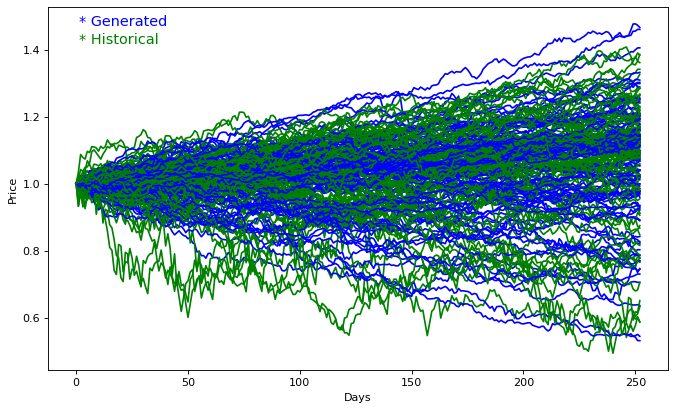

In [20]:
objEva_R1_syn.SynScenerioPlot()

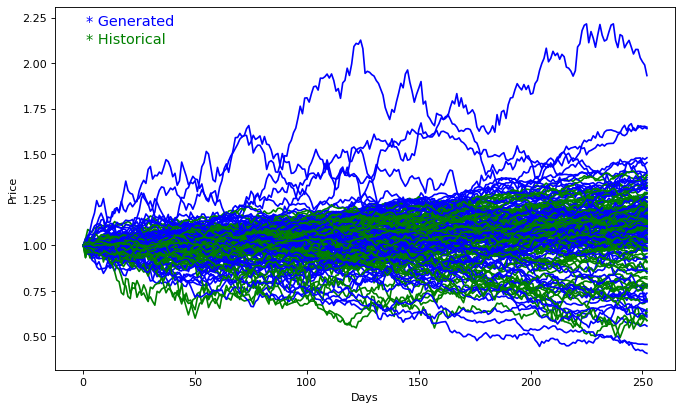

In [21]:
objEva_R2_syn.SynScenerioPlot()

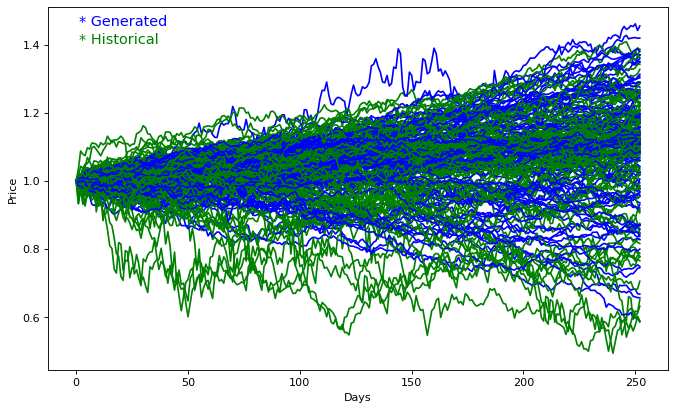

In [22]:
objEva_R3_syn.SynScenerioPlot()

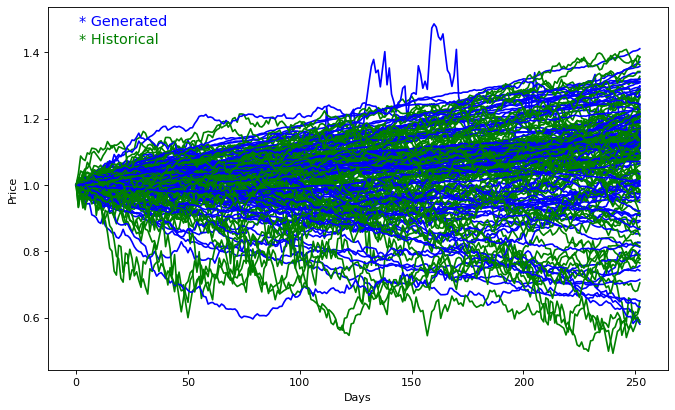

In [23]:
objEva_S_syn.SynScenerioPlot()

In [24]:
# objEva_ML.SynScenerioPlot()